# Exploratory Data Analysis

In [24]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

In [25]:
# Get the data
df1 = pd.read_csv("olddata/firstbatch_500Samples.csv")
df2 = pd.read_csv("olddata/secondbatch_500Samples.csv")
df=pd.concat([df1,df2])

In [26]:
df.head()

,Unnamed: 0,Snelheid,Omvang1,Positie1,Omvang2,Positie2,Relatie,Speed
0,0,0.0,0.0,-15.0,15.0,-75.0,15.0,1.012087
1,1,0.0,0.0,15.0,30.0,30.0,-90.0,0.844846
2,2,0.0,0.0,15.0,60.0,-30.0,-90.0,2.491373
3,3,0.0,0.0,45.0,60.0,75.0,60.0,1.249660
4,4,0.0,0.0,75.0,30.0,-75.0,-90.0,1.112912


In [27]:
data=df.drop(columns=['Unnamed: 0'])

In [28]:
data.head()

,Snelheid,Omvang1,Positie1,Omvang2,Positie2,Relatie,Speed
0,0.0,0.0,-15.0,15.0,-75.0,15.0,1.012087
1,0.0,0.0,15.0,30.0,30.0,-90.0,0.844846
2,0.0,0.0,15.0,60.0,-30.0,-90.0,2.491373
3,0.0,0.0,45.0,60.0,75.0,60.0,1.249660
4,0.0,0.0,75.0,30.0,-75.0,-90.0,1.112912


In [6]:
summary_stats = data.describe()
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df


,Snelheid,Omvang1,Positie1,Omvang2,Positie2,Relatie,Speed
count,998.000000,998.000000,998.000000,998.00000,998.00000,998.000000,998.000000
mean,4.505010,37.545090,-7.620240,37.45491,-7.43988,-7.650301,3.152739
std,2.874066,25.597875,51.808062,25.60669,51.79074,51.790556,1.595731
min,0.000000,0.000000,-90.000000,0.00000,-90.00000,-90.000000,0.253396
25%,2.000000,15.000000,-56.250000,15.00000,-45.00000,-56.250000,1.897910
50%,5.000000,45.000000,-15.000000,30.00000,0.00000,-15.000000,2.917292
75%,7.000000,60.000000,30.000000,60.00000,41.25000,30.000000,4.261793
max,9.000000,75.000000,75.000000,75.00000,75.00000,75.000000,8.408892


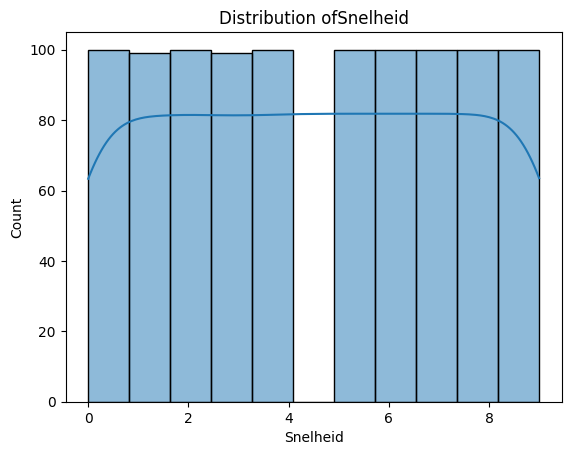

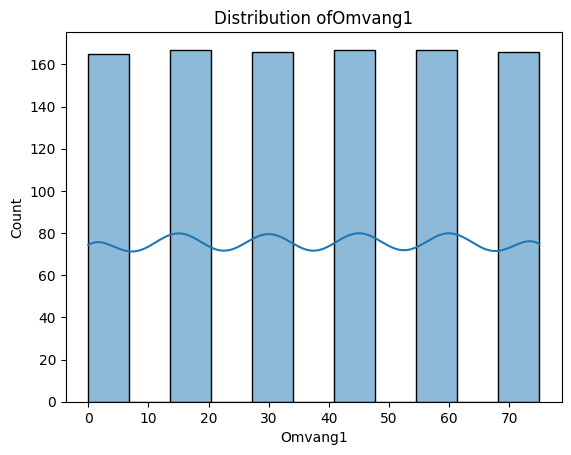

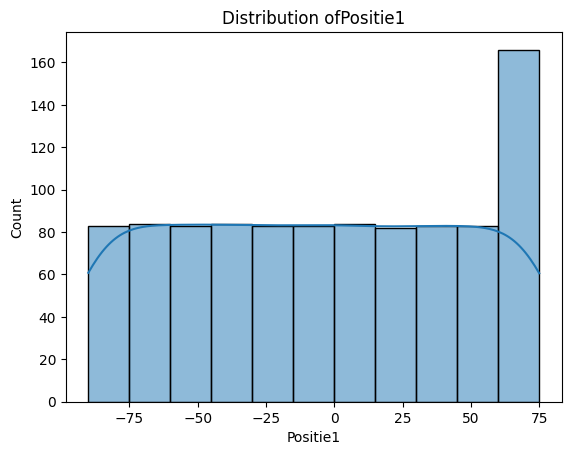

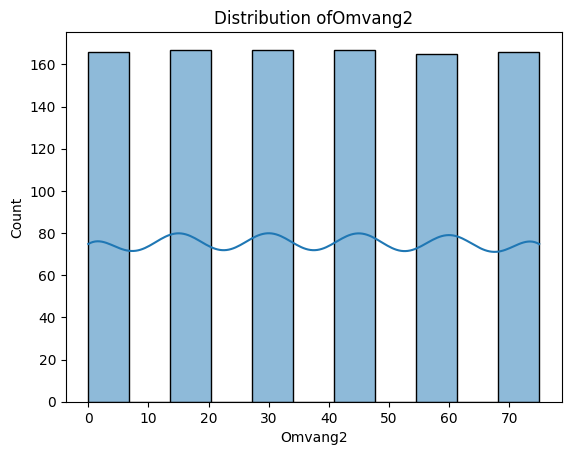

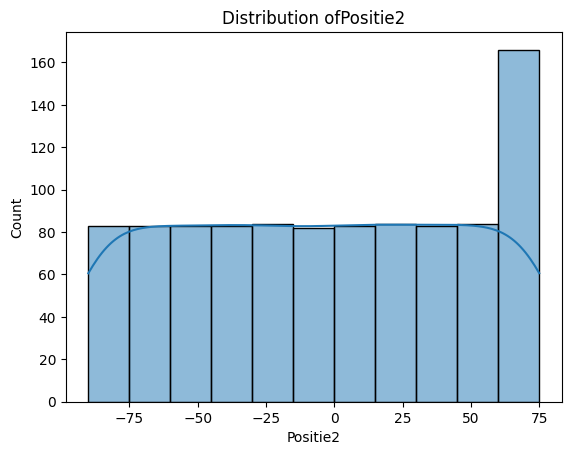

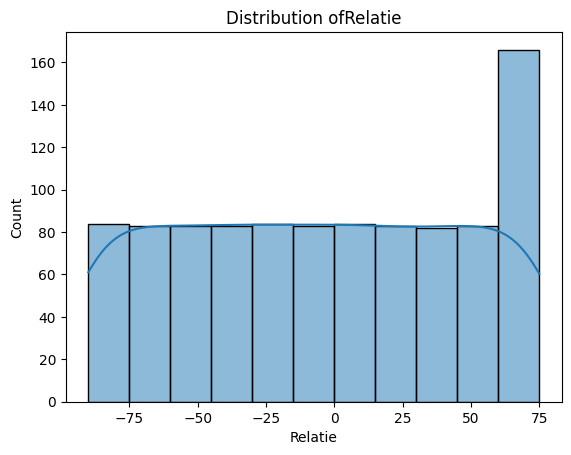

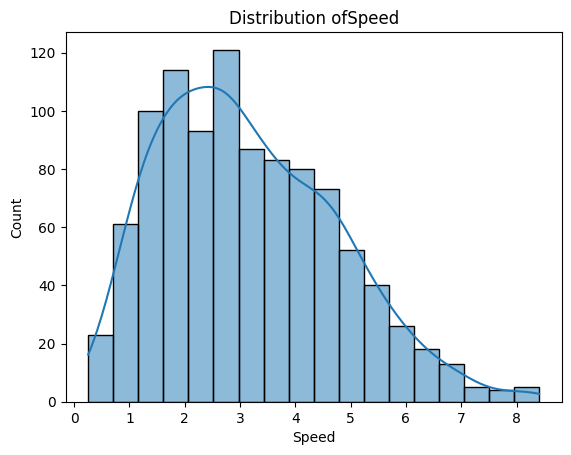

In [7]:
# Plotting individual variables
for col in data.columns:
    sns.histplot(data[col], kde=True)
    plt.title('Distribution of' + col)
    plt.show()

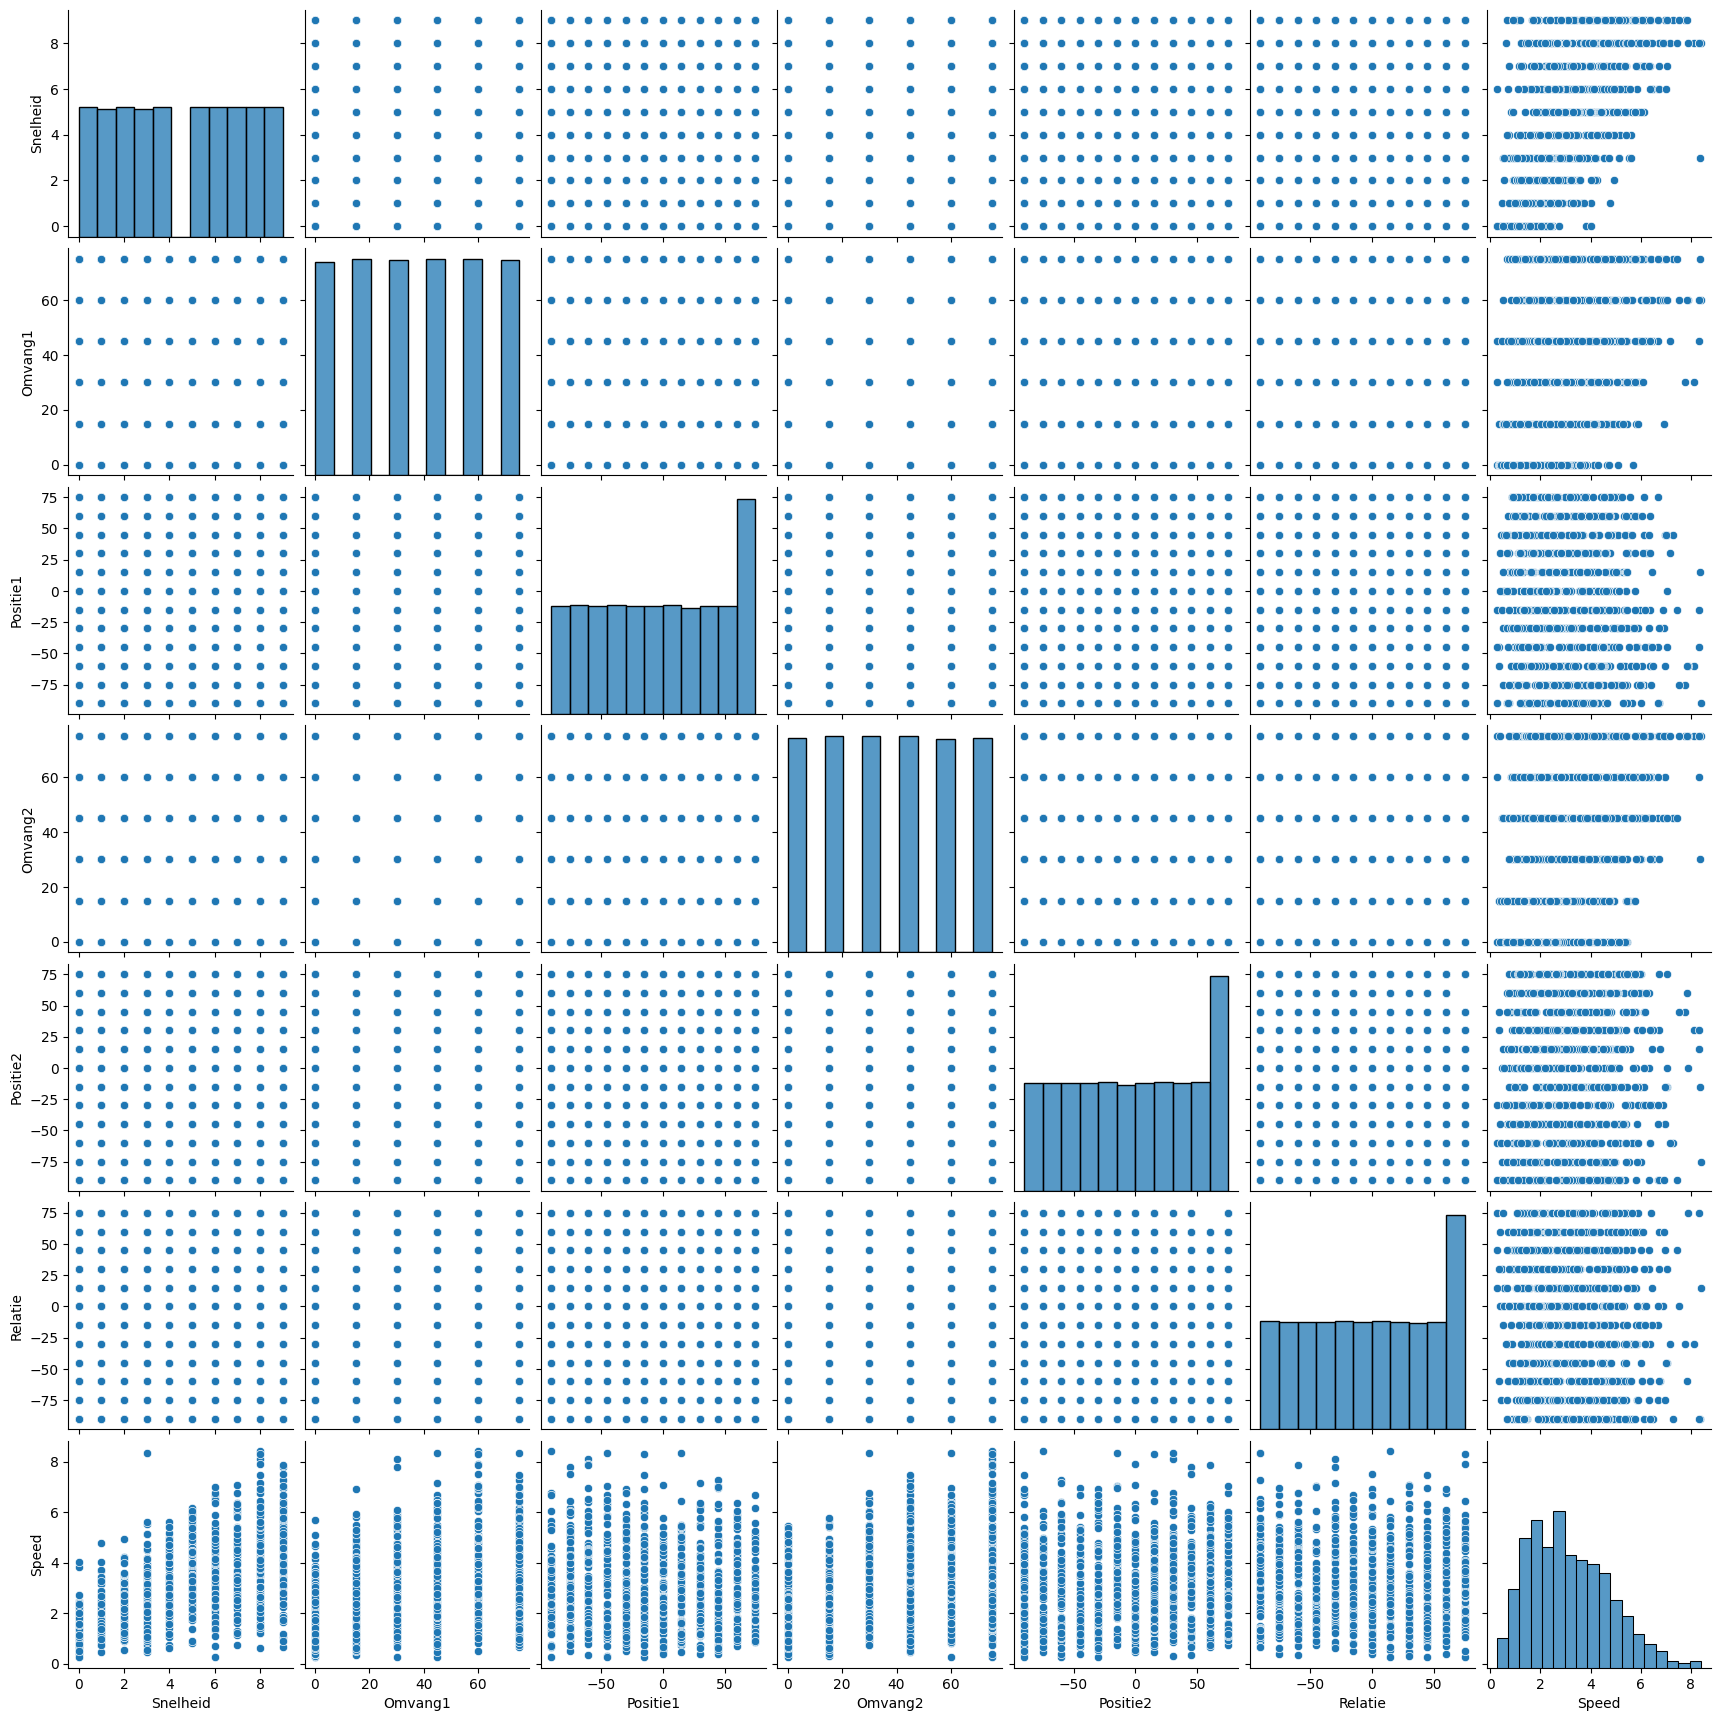

In [8]:
# Pairwise relationships and correlations
sns.pairplot(data)
plt.show()

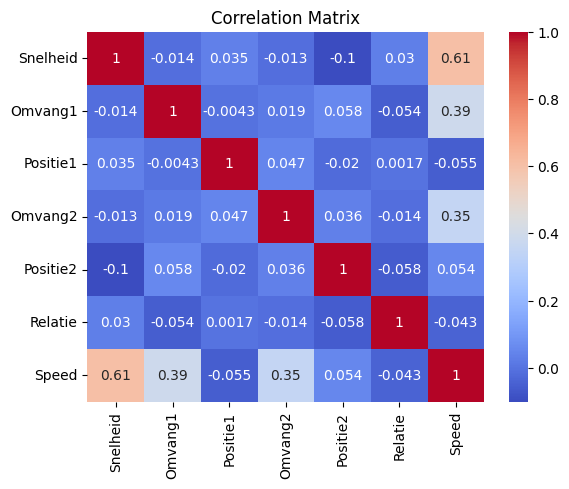

In [9]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

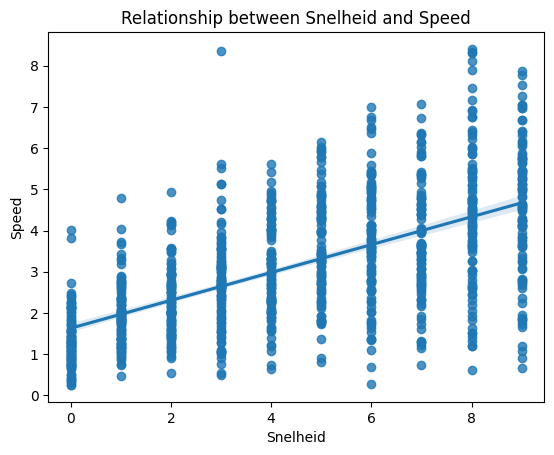

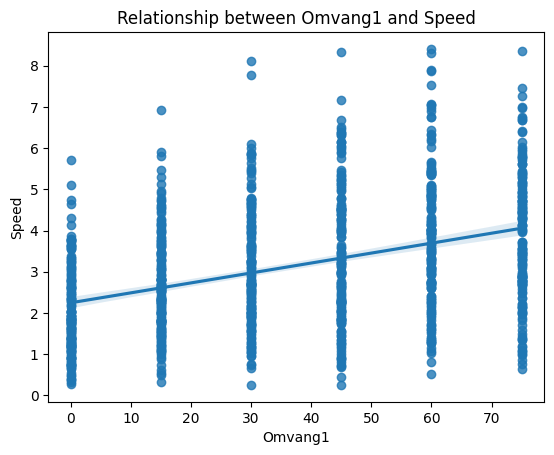

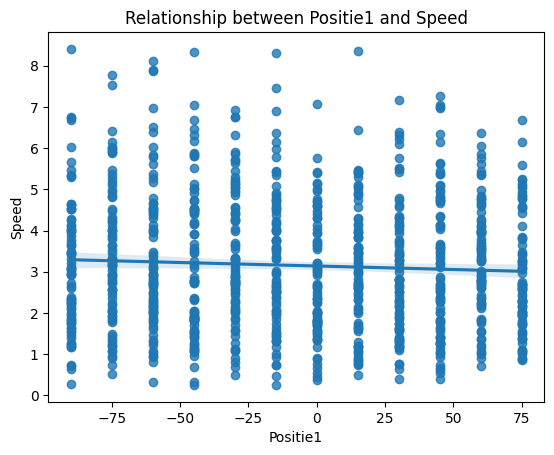

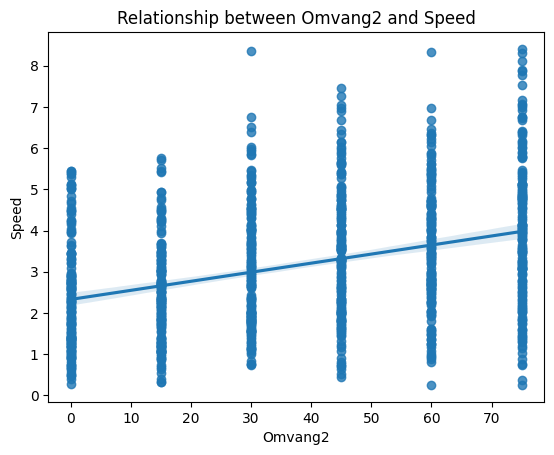

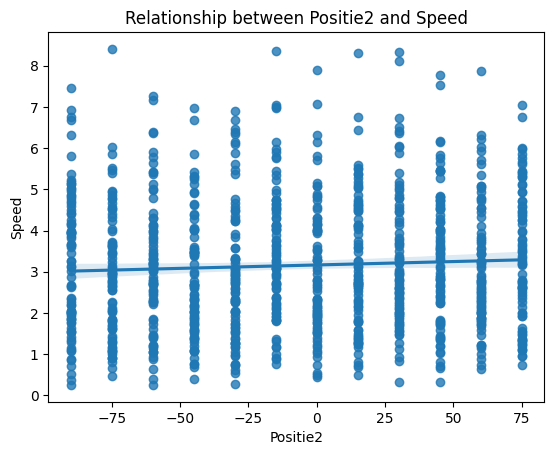

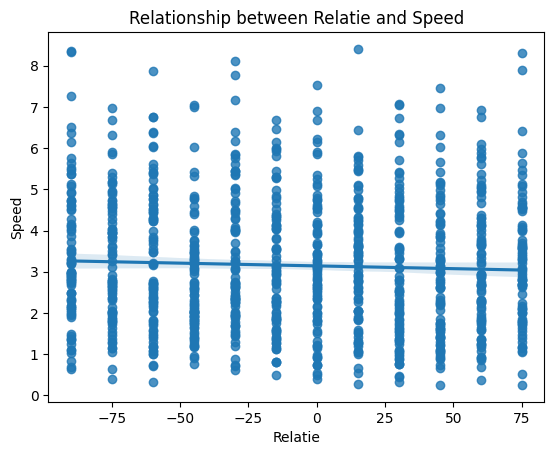

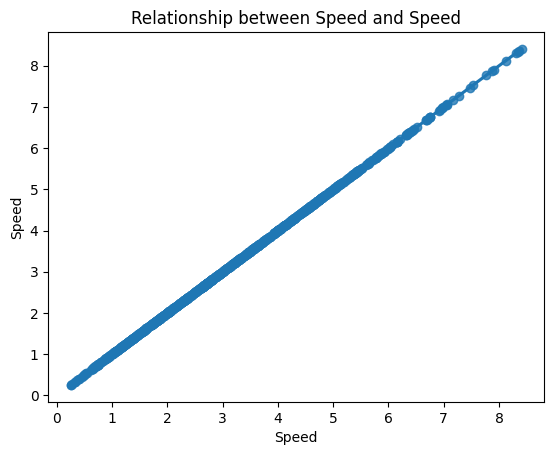

In [10]:
# Plotting relationship between variables and Speed
for col in data.columns:
    sns.regplot(x=col, y='Speed', data=data)
    plt.title('Relationship between ' + col + ' and Speed')
    plt.show()

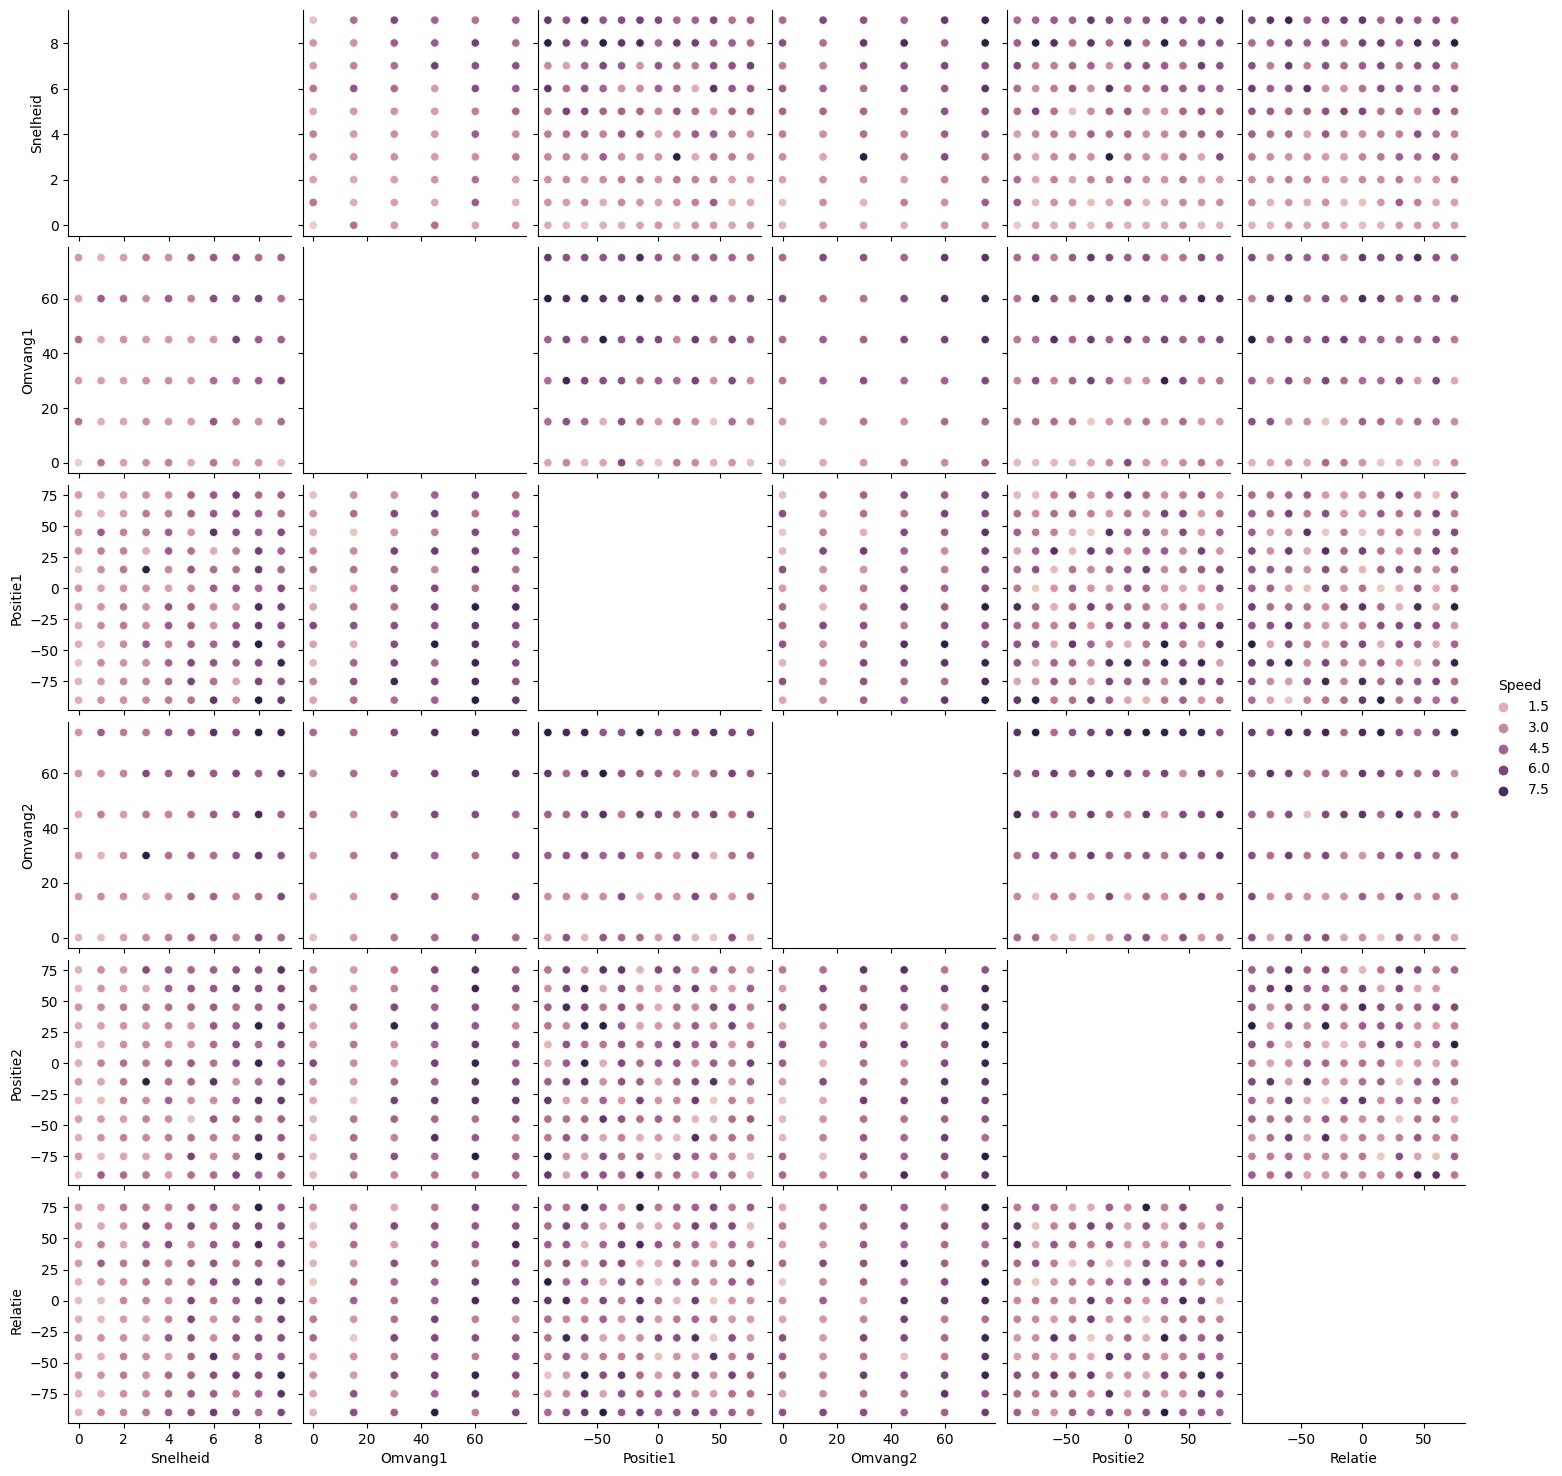

In [11]:
# # pairwise plot with omvang1 and omvang2 and speed as hue
sns.pairplot(data, hue='Speed')

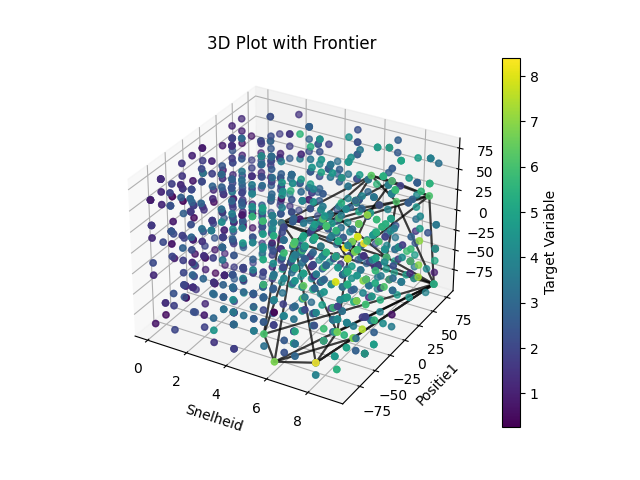

In [65]:
from scipy.spatial import ConvexHull
data.head()
display_dimensions=['Snelheid','Positie1','Positie2']
target = data[['Speed']]  # Target variable
dimensions = data[display_dimensions]  # Dimensions
#convert dimensions to numpy array
dimensions = dimensions.to_numpy()
target = target.to_numpy()
filtered_Data=data[data['Speed']>6]
filtered_Data_dimensions=filtered_Data[display_dimensions]
filtered_Data_dimensions=filtered_Data_dimensions.to_numpy()
filtered_Data_target=filtered_Data[['Speed']]
filtered_Data_target=filtered_Data_target.to_numpy()
hull = ConvexHull(filtered_Data_dimensions)
# Frontier points
frontier = np.random.randn(50, 3)[0]

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(dimensions[:, 0], dimensions[:, 1], dimensions[:, 2], c=target)

for s in hull.simplices:
    s = np.append(s, s[0])  # Close the loop
    ax.plot3D(filtered_Data_dimensions[s, 0], filtered_Data_dimensions[s, 1], filtered_Data_dimensions[s, 2], 'k-', alpha=0.5)

# Customize the plot
ax.set_xlabel(display_dimensions[0])
ax.set_ylabel(display_dimensions[1])
ax.set_zlabel(display_dimensions[2])
ax.set_title('3D Plot with Frontier')
plt.colorbar(ax.scatter(dimensions[:, 0], dimensions[:, 1], dimensions[:, 2], c=target), label='Target Variable')

# Show the plot
plt.show()

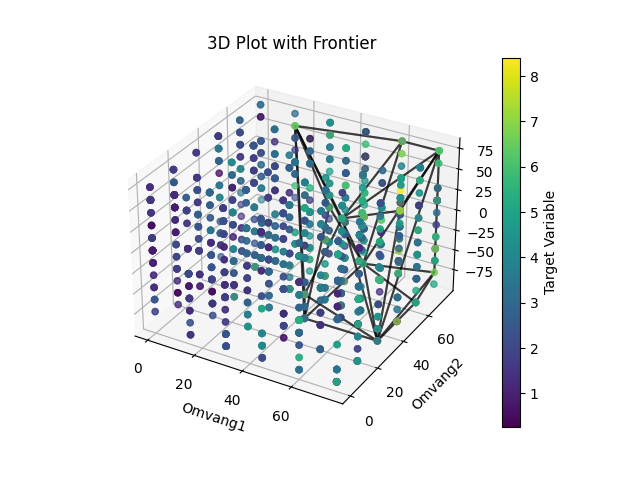

In [64]:
from scipy.spatial import ConvexHull
data.head()
display_dimensions=['Omvang1','Omvang2','Relatie']
target = data[['Speed']]  # Target variable
dimensions = data[display_dimensions]  # Dimensions
#convert dimensions to numpy array
dimensions = dimensions.to_numpy()
target = target.to_numpy()
filtered_Data=data[data['Speed']>6]
filtered_Data_dimensions=filtered_Data[display_dimensions]
filtered_Data_dimensions=filtered_Data_dimensions.to_numpy()
filtered_Data_target=filtered_Data[['Speed']]
filtered_Data_target=filtered_Data_target.to_numpy()
hull = ConvexHull(filtered_Data_dimensions)
# Frontier points
frontier = np.random.randn(50, 3)[0]

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(dimensions[:, 0], dimensions[:, 1], dimensions[:, 2], c=target)

for s in hull.simplices:
    s = np.append(s, s[0])  # Close the loop
    ax.plot3D(filtered_Data_dimensions[s, 0], filtered_Data_dimensions[s, 1], filtered_Data_dimensions[s, 2], 'k-', alpha=0.5)

# Customize the plot
ax.set_xlabel(display_dimensions[0])
ax.set_ylabel(display_dimensions[1])
ax.set_zlabel(display_dimensions[2])
ax.set_title('3D Plot with Frontier')
plt.colorbar(ax.scatter(dimensions[:, 0], dimensions[:, 1], dimensions[:, 2], c=target), label='Target Variable')

# Show the plot
plt.show()

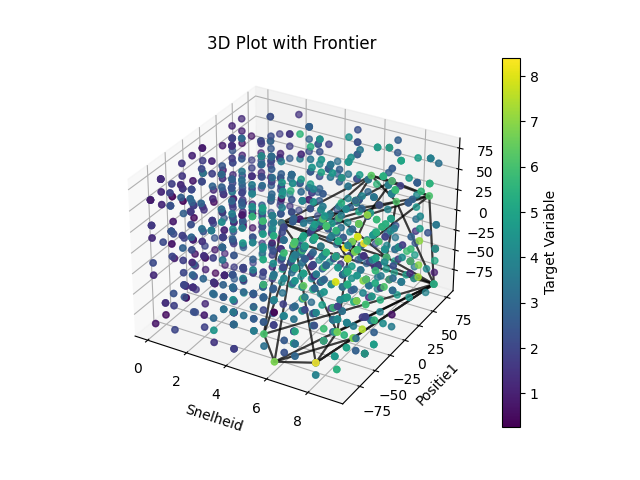